# KMeans algorithm on Iris DataSet
Here we will apply and try to group the 3 flowers using KMeans clustering.

In [38]:
## Importing important libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Loading the dataset
df = pd.read_csv('./data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.drop(['SepalLengthCm', 'SepalWidthCm'], axis = 'columns', inplace = True)

In [41]:
df.head()

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa


In [42]:
# Rename the column for better ease
df = df.rename(columns = {'Id' : 'ID', 'PetalLengthCm' : 'Len', 'PetalWidthCm' : 'Wid', 'Species' : 'Class'})

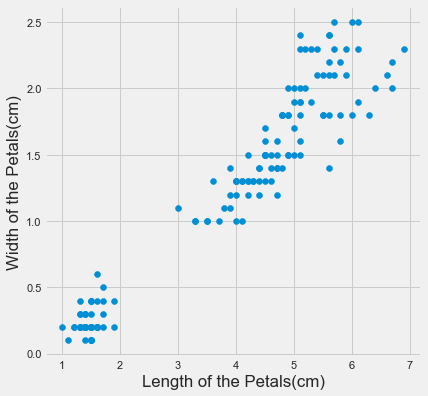

In [43]:
# Visualize the dataset
plt.figure(figsize = (6, 6))
plt.scatter(df['Len'], df['Wid'])
plt.xlabel('Length of the Petals(cm)')
plt.ylabel('Width of the Petals(cm)')
plt.show()

In [44]:
# Scale the data
scaler = MinMaxScaler()

scaler.fit(df[['Len']])
df['Len'] = scaler.transform(df[['Len']])

scaler.fit(df[['Wid']])
df['Wid'] = scaler.transform(df[['Wid']])
df

,ID,Len,Wid,Class
0,1,0.067797,0.041667,Iris-setosa
1,2,0.067797,0.041667,Iris-setosa
2,3,0.050847,0.041667,Iris-setosa
3,4,0.084746,0.041667,Iris-setosa
4,5,0.067797,0.041667,Iris-setosa
...,...,...,...,...
145,146,0.711864,0.916667,Iris-virginica
146,147,0.677966,0.750000,Iris-virginica
147,148,0.711864,0.791667,Iris-virginica
148,149,0.745763,0.916667,Iris-virginica


In [46]:
# Fitting the model by our own intuition
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['Len', 'Wid']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
df['Cluster'] = y_pred
df.head()

,ID,Len,Wid,Class,Cluster
0,1,0.067797,0.041667,Iris-setosa,1
1,2,0.067797,0.041667,Iris-setosa,1
2,3,0.050847,0.041667,Iris-setosa,1
3,4,0.084746,0.041667,Iris-setosa,1
4,5,0.067797,0.041667,Iris-setosa,1


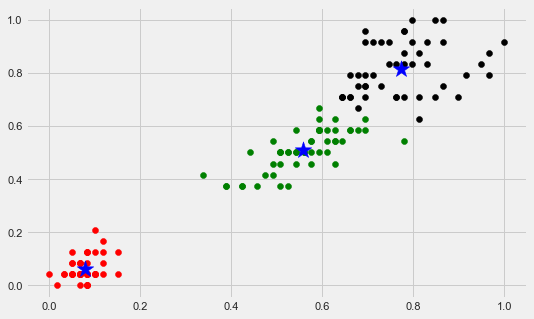

In [60]:
# Making new dataframes for storing the different clusters
df_1 = df[df['Cluster'] == 0]
df_2 = df[df['Cluster'] == 1]
df_3 = df[df['Cluster'] == 2]

# Visualize the clusters
plt.scatter(df_1.Len, df_1.Wid, color = 'green')
plt.scatter(df_2.Len, df_2.Wid, color = 'red')
plt.scatter(df_3.Len, df_3.Wid, color = 'black')

# Mark the centroids too
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'blue', marker = '*', s = 300)

plt.show()